<a href="https://colab.research.google.com/github/ddjaelcorrea/curso_ciencia_de_datos/blob/main/Trabajo_integrador_de_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO INTEGRADOR DE CIENCIA DE DATOS**
---
El siguiente trabajo tiene por objetivo conocer el perfil de los beneficiarios del programa social "Potenciar Trabajo".

Potenciar Trabajo es un programa nacional de inclusión socioproductiva y desarrollo local, que está destinado a personas, entre 18 y 65 años, en situación de vulnerabilidad y/o que desempeñan alguna actividad de la economía popular. En ese sentido, tiene como objetivo contribuir a mejorar el empleo y generar nuevas propuestas productivas a través del desarrollo de proyectos socio-productivos, socio-comunitarios, socio-laborales y la terminalidad educativa, con el fin de promover la inclusión social plena para personas que se encuentren en situación de vulnerabilidad social y económica.

Para conocer el perfil de los beneficiarios, se analizaran las siguientes variables: "nacionalidad", "provincia de residencia", "edad" y "sexo".


In [2]:
import pandas as pd #instalación de librerías
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
potenciar_trabajo=pd.read_csv("../content/drive/MyDrive/Colab Notebooks/Potenciar trabajo V.4.csv")#lectura del csv
potenciar_trabajo

,persona_id,sexo,Edad,nacionalidad,municipio_id,municipio,provincia_id,provincia,departamento_id,departamento
0,173,M,68.0,Argentina,62740274,Florencio Varela,6,Buenos Aires,6274,Florencio Varela
1,355,M,31.0,Argentina,64270427,La Matanza,6,Buenos Aires,6427,La Matanza
2,364,M,31.0,Argentina,62450245,Ensenada,6,Buenos Aires,6245,Ensenada
3,368,M,31.0,Argentina,64970497,Lujan,6,Buenos Aires,6497,LujÃ¡n
4,386,M,31.0,Argentina,20010001,Ciudad De Buenos Aires,2,Ciudad de Buenos Aires,2001,Comuna 1
...,...,...,...,...,...,...,...,...,...,...
1048570,1540393,F,22.0,Argentina,64270427,La Matanza,6,Buenos Aires,6427,La Matanza
1048571,1540394,F,19.0,Argentina,67840784,Suipacha,6,Buenos Aires,6784,Suipacha
1048572,1540395,F,24.0,Argentina,64130413,Junin,6,Buenos Aires,6413,JunÃ­n
1048573,1540396,F,21.0,Argentina,62600260,Esteban Echeverria,6,Buenos Aires,6260,Esteban EcheverrÃ­a


### **1- ANÁLISIS EXPLOTORIO**

In [ ]:
potenciar_trabajo.sample(70)#muestra de forma aleatoria 70 filas

,persona_id,sexo,Edad,nacionalidad,municipio_id,municipio,provincia_id,provincia,departamento_id,departamento
220501,1070408,M,48.0,Argentina,140140100,Cordoba,14,Córdoba,14014,Capital
600433,511014,F,36.0,Argentina,62600260,Esteban Echeverria,6,Buenos Aires,6260,Esteban EcheverrÃ­a
71341,321629,M,49.0,Argentina,63570357,General Pueyrredon,6,Buenos Aires,6357,General PueyrredÃ³n
147897,819853,M,58.0,Paraguay,540630059,Puerto Libertad,54,Misiones,54063,IguazÃº
1008419,1474441,F,21.0,Argentina,66580658,Quilmes,6,Buenos Aires,6658,Quilmes
...,...,...,...,...,...,...,...,...,...,...
157150,864919,M,43.0,Argentina,64900490,Lomas De Zamora,6,Buenos Aires,6490,Lomas de Zamora
841086,1121807,F,23.0,Argentina,60280028,Almirante Brown,6,Buenos Aires,6028,Almirante Brown
786770,1019828,F,43.0,Argentina,221190052,Presidencia De La Plaza,22,Chaco,22119,Presidencia de la Plaza
78613,331361,M,43.0,Argentina,62740274,Florencio Varela,6,Buenos Aires,6274,Florencio Varela


In [ ]:
potenciar_trabajo.shape #cantidad de filas y columnas del dataset

(1048575, 10)

In [ ]:
potenciar_trabajo.dtypes #tipo de datos

persona_id           int64
sexo                object
Edad               float64
nacionalidad        object
municipio_id         int64
municipio           object
provincia_id         int64
provincia           object
departamento_id      int64
departamento        object
dtype: object

In [ ]:
potenciar_trabajo.isnull().sum() #dato nulos

persona_id             0
sexo                   0
Edad                  62
nacionalidad       69614
municipio_id           0
municipio              0
provincia_id           0
provincia              0
departamento_id        0
departamento           0
dtype: int64

### **2-HIPÓTESIS**
1. La mayor parte de los beneficiarios del programa Potenciar Trabajo residen
en las provincias más densamente pobladas: Buenos Aires (17.569.053 habitantes), Córdoba (3.978.984 habitantes), Santa Fe (3.556.522 habitantes),Ciudad Autónoma de Buenos Aires (3.120.612 habitantes) y Mendoza (2.014.533 habitantes)
2. A menor edad, mayor cantidad de inscriptos en el programa.
3. Las mujeres en edad economicamente activa representan la mayor parte de los benefiarios del programa.

###**3-ANÁLISIS DE VARIABLES**

### **Variable N° 1: Nacionalidad**

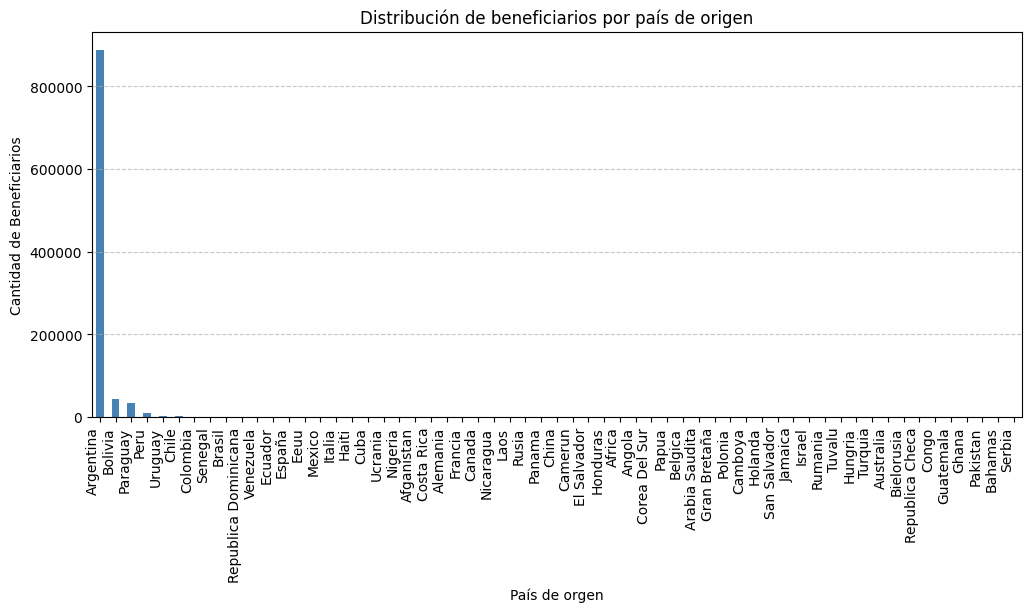

In [ ]:
nacionalidad_counts = potenciar_trabajo['nacionalidad'].value_counts()
plt.figure(figsize=(12, 5))
nacionalidad_counts.plot(kind='bar', color='steelblue')
plt.title('Distribución de beneficiarios por país de origen')
plt.xlabel('País de orgen')
plt.ylabel('Cantidad de Beneficiarios')
plt.xticks(rotation=90,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Del total de inscriptos al programa Potenciar Trabajo, la mayoria son de nacionalidad argentina. Luego, en menor proporción, destacan los beneficiarios provenientes de paises limitrofes como Bolivia, Paraguay, Uruguay y Chile.También destacan, en tercer puesto, los beneficiarios de origen peruano.

### **Variable N° 2: Provincia**

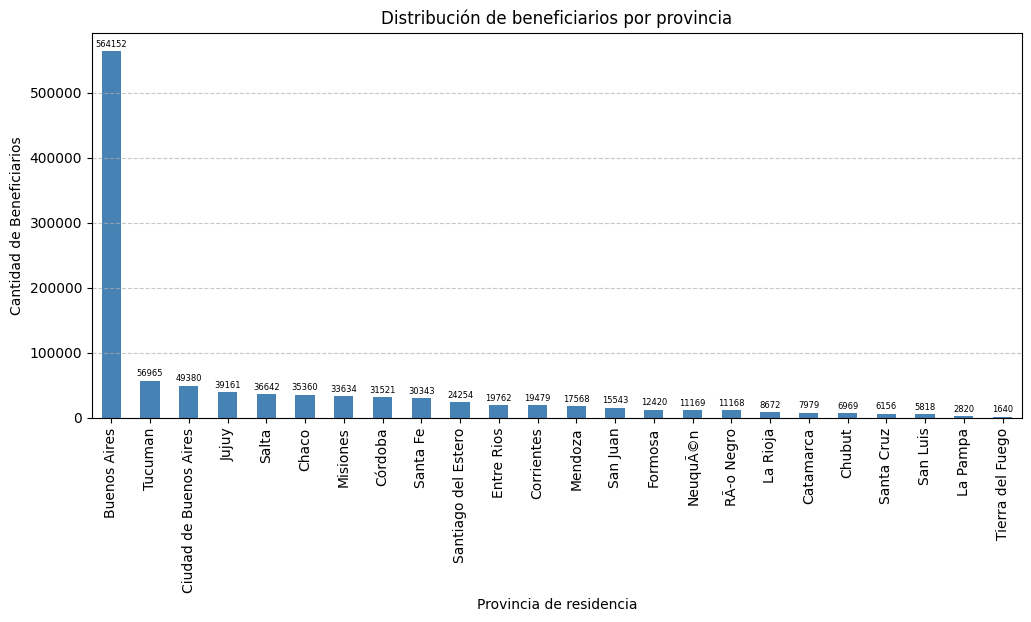

In [ ]:
provincia_counts = potenciar_trabajo['provincia'].value_counts()
plt.figure(figsize=(12, 5))
provincia_counts.plot(kind='bar', color="steelblue")
plt.xticks(rotation=90)
plt.title ("Distribución de beneficiarios por provincia")
plt.xlabel ("Provincia de residencia")
plt.ylabel ("Cantidad de Beneficiarios")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=6,xytext=(0, 5),
                       textcoords='offset points')
plt.show()

En cuanto a la distribución de beneficiarios por provincia de residencia, Buenos Aires, con 56.4152 titulares, es la provincia que más beneficiarios tiene. Un 3% de su población se encuentra inscripta en el programa Potenciar Trabajo. Le sigue Tucumán, con 56.965; C.A.B.A, con 49.380 y Jujuy con 39.162 personas.

### **Variable N°3: Edad**

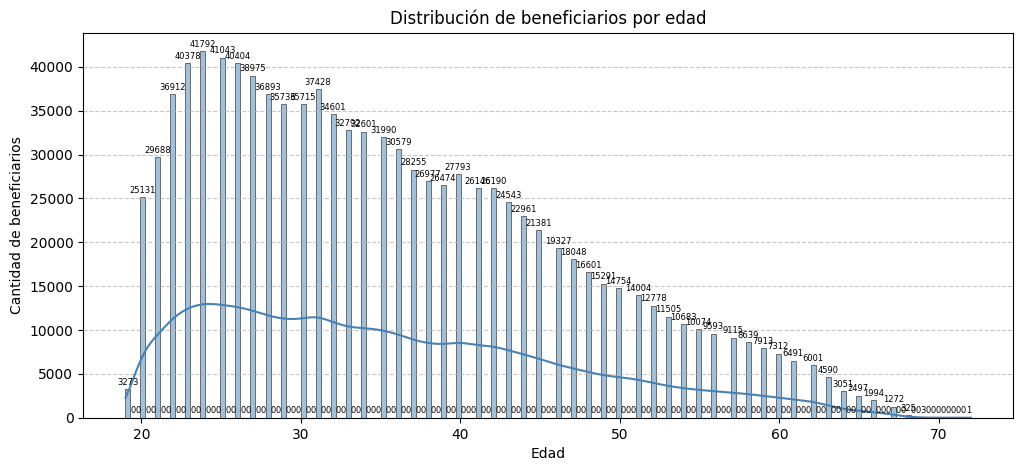

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=potenciar_trabajo, x='Edad',kde=True, color="steelblue") #histograma
plt.title ("Distribución de beneficiarios por edad")
plt.xlabel ("Edad")
plt.ylabel ("Cantidad de beneficiarios")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=6,xytext=(0, 5),
                       textcoords='offset points')
plt.show()

La mayoría de los titulares del Potenciar Trabajo son jóvenes, alrededor de un 35% de ellos tiene entre 18 y 29 años.Lo sigue el grupo etario que va entre los 30 y 39 años.

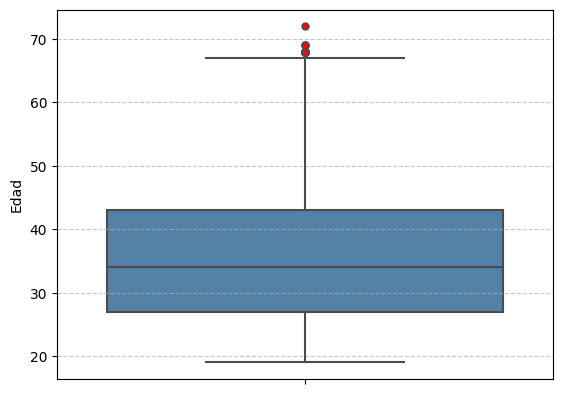

In [ ]:
sns.boxplot(data=potenciar_trabajo, y="Edad", color="steelblue",flierprops={'markerfacecolor': 'red', 'marker': 'o'}) #diagrama de caja
plt.ylabel ("Edad")
plt.grid(axis='y', linestyle='--', alpha=0.7)

En el gráfico se puede observar la presencia de algunos valores atípicos. Por consiguiente, reemplazaremos estos valores por la mediana.

Tal como lo indica la línea central del diagrama de caja, la mediana de los datos ronda los 35 años.

In [ ]:
#medidas de tendencia central
print("La media del conjunto edad es",potenciar_trabajo['Edad'].mean())
print("La mediana del conjunto edad es",potenciar_trabajo['Edad'].median())
print("la moda del conjunto (edad)",potenciar_trabajo['Edad'].mode())

La media del conjunto edad es 35.815150598991146
La mediana del conjunto edad es 34.0
la moda del conjunto (edad) 0    24.0
Name: Edad, dtype: float64


In [ ]:
#reemplazo de datos nulos por la media
mediana_edad=potenciar_trabajo['Edad'].median()
potenciar_trabajo['Edad'].fillna(mediana_edad,inplace=True)

In [ ]:
potenciar_trabajo.isna().sum()

persona_id             0
sexo                   0
Edad                   0
nacionalidad       69614
municipio_id           0
municipio              0
provincia_id           0
provincia              0
departamento_id        0
departamento           0
dtype: int64

### **Variable N°3: Sexo**

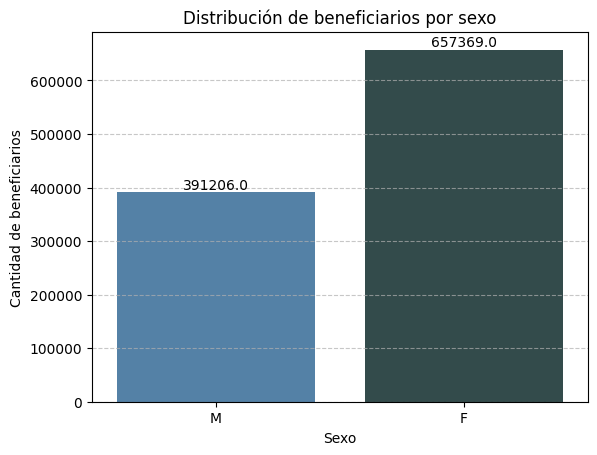

In [ ]:
sns.countplot(data=potenciar_trabajo,x="sexo", palette=['steelblue',"darkslategrey"]) #gráfico de barras
plt.title ("Distribución de beneficiarios por sexo")
plt.xlabel ("Sexo")
plt.ylabel ("Cantidad de beneficiarios")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

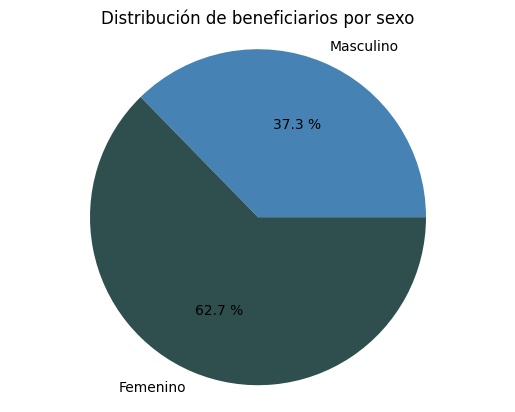

In [ ]:
sexo = ["Masculino","Femenino"]#gráfico circular
valores = [391206, 657369]
plt.pie(valores, labels=sexo, autopct="%0.1f %%",colors=['steelblue', 'darkslategrey'])
plt.axis("equal")
plt.title ("Distribución de beneficiarios por sexo")
plt.show()

De la totalidad de beneficarios registrados para el año 2022, 65.7369 corresponden a mujeres,las cuales representan el 62,7%. Los hombres en cambio, ascienden al 37,3%, sumando un total de 39.1206 personas del sexo masculino.

Se observa un desvalance en las clases de la variable sexo

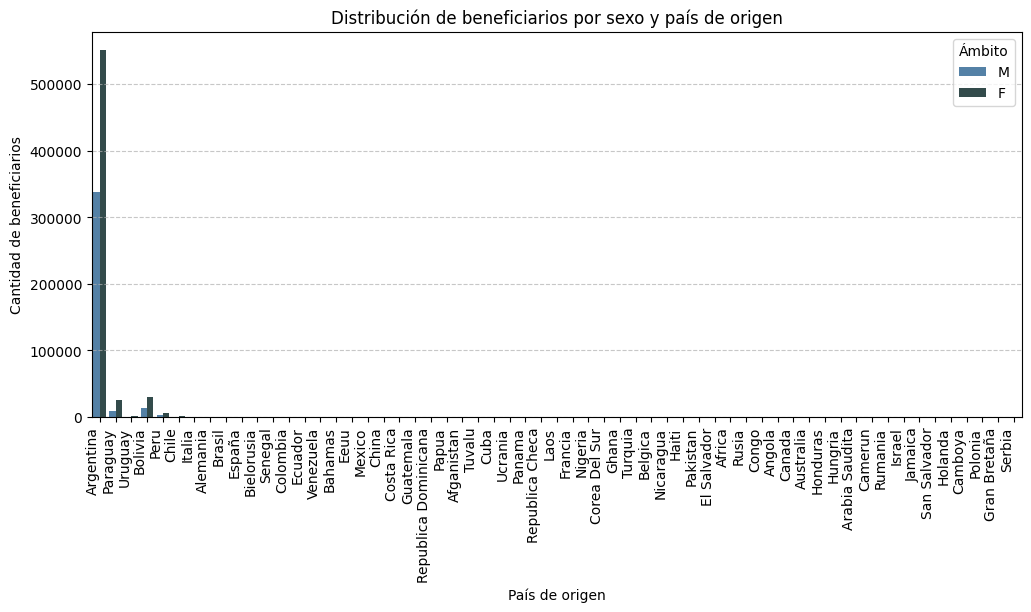

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='nacionalidad', hue='sexo', data=potenciar_trabajo, palette=['steelblue', 'darkslategrey'])
plt.title('Distribución de beneficiarios por sexo y país de origen')
plt.xlabel('País de origen')
plt.ylabel('Cantidad de beneficiarios')
plt.legend(title='Ámbito')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En lo que respecta a la distribución de beneficiarios según su sexo y país de origen, se observa una predominancia de mujeres sobre hombres, tanto en la categoría de aquellos que poseen nacionalidad argentina como en los provenientes de países limítrofes.

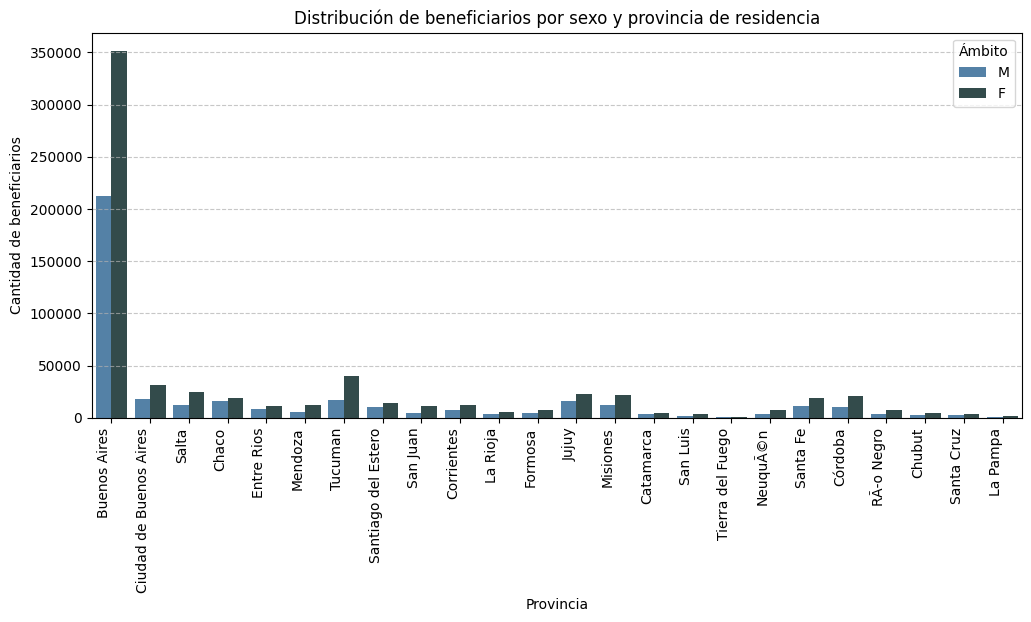

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='provincia', hue='sexo', data=potenciar_trabajo, palette=['steelblue', 'darkslategrey'])
plt.title('Distribución de beneficiarios por sexo y provincia de residencia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de beneficiarios')
plt.legend(title='Ámbito')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En relación a la distribución por sexo y provincia se evidencia una mayor presencia de mujeres. Este patrón se replica en la totalidad de las provincias argentinas, asi como en la Ciudad Autónoma de Buenos Aires.

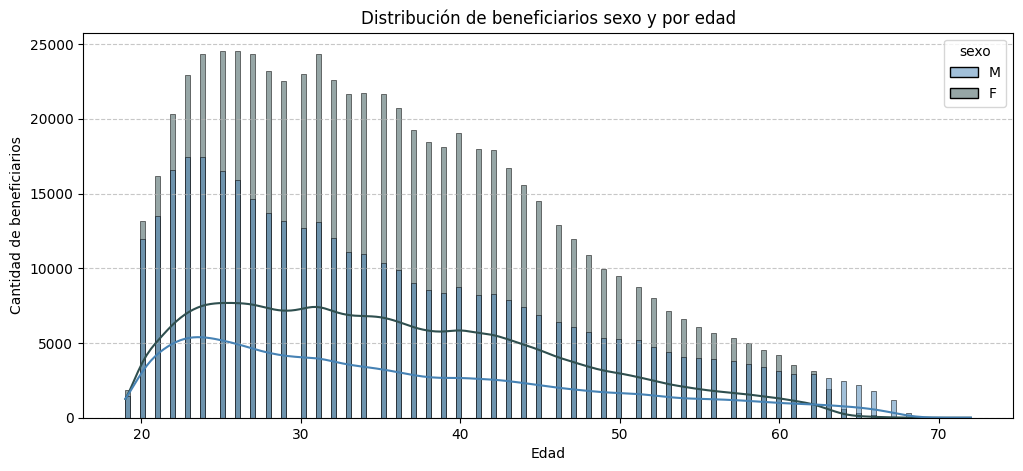

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=potenciar_trabajo, x='Edad',kde=True, palette=['steelblue', 'darkslategrey'],hue="sexo") #histograma
plt.title ("Distribución de beneficiarios sexo y por edad")
plt.xlabel ("Edad")
plt.ylabel ("Cantidad de beneficiarios")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribución de la población según sexo y edad, para año 2022, da cuenta de una mayor proporción de mujeres que varones en los tramos de edades más jóvenes (de 20 años en adelante), mientras que se invierte la relación en las edades más avanzadas (de 63 años en adelante).

###**4-MATRIZ DE CORRELACIÓN**

<ipython-input-5-d5a0e5d68f43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(potenciar_trabajo.corr(),annot=True,cmap="Blues")


<Axes: >

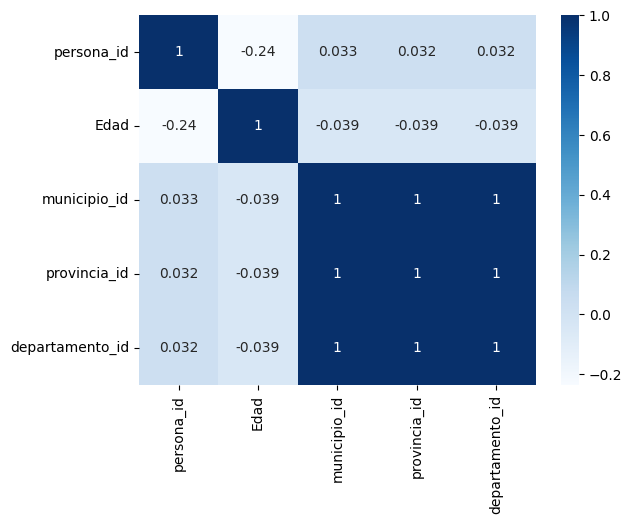

In [5]:
sns.heatmap(potenciar_trabajo.corr(),annot=True,cmap="Blues")

###**5-CONCLUSIÓN**

El análisis del programa Potenciar Trabajo reveló varios aspectos interesantes. En primer lugar, la mayoría de los inscriptos son de nacionalidad argentina, con una presencia significativa de beneficiarios provenientes de países limítrofes, destacando en particular los originarios de Bolivia, Paraguay y Perú, seguidos por aquellos de origen uruguayo y chileno.

Al examinar la distribución por provincia, Buenos Aires lidera en cantidad de beneficiarios, con un 3% de su población participando en el programa. Le siguen Tucumán, C.A.B.A, Jujuy, Salta y Chaco. Cabe destacar que estas últimas, según un estudio del Instituto de Estudios Laborales y Sociales de la UCES (Idelas), son las que lideran el podio de provincias con mayor tasa de empleo informal en la Argentina. Este factor podría llegar a explicar la mayor concentración de beneficiarios en esas provincias, no solo la densidad de población tal como se planeo en la hipótesis.

En cuanto al sexo, de la totalidad de inscritos, se observa que el 62,7% corresponden a mujeres, mientras que los hombres representan el 37,3%.
Esta diferencia se evidencia al examinar la distribución de beneficiarios según sexo y país de origen, donde se destaca una predominancia de mujeres sobre hombres, tanto entre aquellos con nacionalidad argentina como entre los provenientes de otros países Este fenómeno tambipen se replica a nivel provincial.

Además, al explorar la distribución de la población según sexo y edad, se identifica una mayor proporción de mujeres en los tramos más jóvenes, a partir de los 20 años en adelante, mientras que la relación se invierte en las edades más avanzadas, a partir de los 63 años en adelante.

En conjunto, estos hallazgos subrayan la necesidad de considerar enfoques específicos de género al diseñar políticas y estrategias relacionadas con el programa Potenciar Trabajo, con el fin de abordar de manera equitativa las distintas realidades y necesidades de los beneficiarios.


